In [1]:
import os
import sys
import shap
import numpy as np
import pandas as pd

from cgt_perezsechi.visualization.graph import draw
from cgt_perezsechi.manipulation.norm import normalize_psi, normalize_r

c:\Workspace\IJAR\IJAR-python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = pd.read_pickle("../data/x_values.pkl")
num_patients = 500
X_shapley = X.iloc[:num_patients, :]
shap_values = np.load("../data/shap_values.npy")
shap_interaction_values = np.load("../data/shap_interaction_values.npy")

## Percentile 0 filtering

0 percentile filtering for the shap and shap interaction values. This means that the 0% of the values, none of them, are filtered out and the remaining 100% are used to calculate the mean absolute value of the shap values. This is done to foster the most important features and interactions.

In [3]:
percentile = 0

In [4]:
shap_values = np.nan_to_num(shap_values)
sum_shap_values = np.sum(np.abs(shap_values), axis=(0, 1))

In [5]:
psi_1 = pd.DataFrame()
psi_1['value'] = np.sum(shap_values, axis=0) / sum_shap_values
psi_1.set_index(X_shapley.columns, inplace=True)

### Remove diagonal elements from the interaction matrix

We could see in the visualization of the interactions values that elements in the diagonal a hiding inter variables relations due to its magnitude. The diagonal elements of the interaction matrix should be studied in a separate way. In this notebook we will remove the diagonal elements from the interaction matrix and visualize the results.

In [6]:
n_variables = shap_interaction_values.shape[1]
idx_patients = np.repeat(np.arange(num_patients), n_variables)
idx_variables = np.tile(np.arange(n_variables), num_patients)
shap_interaction_values[
    idx_patients, idx_variables, idx_variables
] = 0

In [7]:
sum_shap_interaction_values = np.sum(
    shap_interaction_values, axis=(0, 1, 2)
)

In [8]:
cumulative_shap_interaction_values = np.sum(shap_interaction_values, axis=(0))

In [9]:
r_1 = pd.DataFrame(cumulative_shap_interaction_values / sum_shap_interaction_values)
r_1.rename(columns=dict(list(zip(r_1.columns, X_shapley.columns))), inplace=True)
r_1.set_index(X_shapley.columns, inplace=True)

In [10]:
psi_2 = normalize_psi(psi_1)
r_2 = normalize_r(r_1)

c:\Workspace\IJAR\IJAR-python\.venv\Lib\site-packages\cgt_perezsechi\manipulation\norm.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_edge_width = r.applymap(lambda x: abs(x)).max().max()
c:\Workspace\IJAR\IJAR-python\.venv\Lib\site-packages\cgt_perezsechi\manipulation\norm.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r = r.copy().applymap(lambda x: x / max_edge_width)


In [11]:

shap_cmap = shap.plots.colors.red_blue
positive_color = shap_cmap(0.0)[:3]
negative_color = shap_cmap(1.0)[:3] 

### Positive alpha 0.01, Negative alpha 0.01
positive_alpha = 0.01 <br />
negative_alpha = 0.01 <br />
positive_beta = 0 <br />
negative_beta = 0 <br />

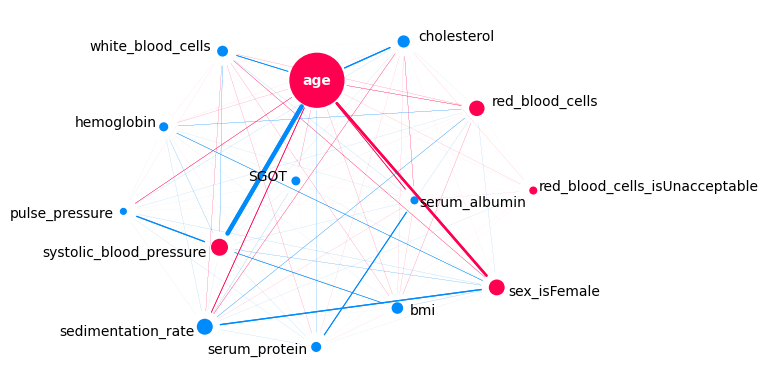

In [14]:
positive_alpha = 0.01
negative_alpha = 0.01
positive_beta = 0
negative_beta = 0
draw(
    psi=psi_2,
    r=r_2,
    positive_alpha=positive_alpha,
    negative_alpha=negative_alpha,
    positive_beta=positive_beta,
    negative_beta=negative_beta,
    negative_color=negative_color,
    positive_color=positive_color,
)

### Positive alpha 0.05, Negative alpha 0.05
positive_alpha = 0.05 <br />
negative_alpha = 0.05 <br />
positive_beta = 0 <br />
negative_beta = 0 <br />

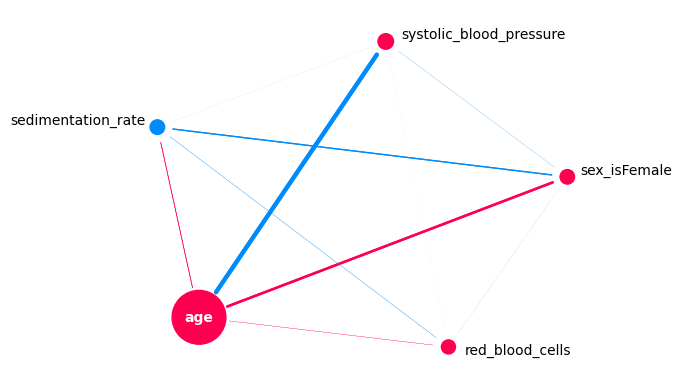

In [13]:
positive_alpha = 0.05
negative_alpha = 0.05
positive_beta = 0
negative_beta = 0
draw(
    psi=psi_2,
    r=r_2,
    positive_alpha=positive_alpha,
    negative_alpha=negative_alpha,
    positive_beta=positive_beta,
    negative_beta=negative_beta,
    negative_color=negative_color,
    positive_color=positive_color,
)